<a href="https://colab.research.google.com/github/shaymargolis/Android-Image-Cropper/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
import math

dx = 1

#  Size of test area [m]
L = 40
H = 40
W = 5

iron_width = 1

rows = math.ceil(H/dx)
cols = math.ceil(L/dx)

electric_rows = math.ceil(W/dx)

#  Molihut of earth
sigma_earth = 6*(10**-2)

#
#
V = 220  # {Volt]
S = 2    # Side of tunnel [m]
h = 20   # depth of tunnel [m]

In [0]:
import math
import numpy as np


def avg_current(field_x, sigma_x):
    J = sigma_x[:, 1:-1] * field_x[:, 1:-1]
    total = np.sum(J * dx, axis=0)

    return np.average(total), np.std(total)


def all_current(field_x, sigma_x):
    length = len(field_x[:, 1:-1])

    J = sigma_x[:, 1:-1] * field_x[:, 1:-1]
    total = np.sum(J * dx, axis=0)

    return np.multiply(list(range(1, length)), dx), total




In [0]:

import numpy as np
import matplotlib.pyplot as plt


def z_func(grid, x, y):
    i = x/dx
    j = y/dx
    return grid[i][j]


def plot_grid(grid):

    x = np.arange(0, L, dx)
    y = np.arange(0, H, dx)

    im = plt.imshow(grid, cmap=plt.cm.RdBu, extent=(0, L, H, 0))
    #  cset = plt.contour(grid, np.arange(-1, 1.5, 0.2), linewidths=2, cmap=plt.cm.Set2, extent=(0,L,H,0))
    #  plt.clabel(cset, inline=True, fmt='%1.1f', fontsize=10)
    plt.colorbar(im)

    plt.title('$Grid of Electric voltage$')
    plt.show()


def plot_field_colors(grid):

    x = np.arange(-dx, L+dx, dx)
    y = np.arange(-dx, H+dx, dx)

    im = plt.imshow(grid, cmap=plt.cm.RdBu, extent=(-dx, L+dx, H+dx, -dx))
    #  cset = plt.contour(grid, np.arange(-1, 1.5, 0.2), linewidths=2, cmap=plt.cm.Set2, extent=(0,L,H,0))
    #  plt.clabel(cset, inline=True, fmt='%1.1f', fontsize=10)
    plt.colorbar(im)

    plt.title('$Grid of Electric voltage$')
    plt.show()


def plot_field(field_x, field_y):
    x,y = np.meshgrid(np.arange(0, L, dx), np.arange(0, H, dx))

    fig, ax = plt.subplots()
    q = ax.quiver(x, y, field_x, field_y)

    plt.show()


def plot_current_all(x, current, currentStd):
    # First illustrate basic pyplot interface, using defaults where possible.
    plt.figure()
    plt.plot(x, current, 'ro')
    plt.errorbar(x, current, currentStd, dx/2 * np.ones(len(x)))
    plt.xlabel("x [m]")
    plt.ylabel("I [A]")
    plt.show()
    plt.title("I(x) for different tunnel positions")


def plot_current_singel(x, current):
    # First illustrate basic pyplot interface, using defaults where possible.
    plt.figure()
    plt.plot(x, current, 'ro')
    plt.title("I(X) for single tunnel location")
    plt.xlabel("x [m]")
    plt.ylabel("I [A]")
    plt.show()


def plot_sigma_stds(x, stds):
    # First illustrate basic pyplot interface, using defaults where possible.
    plt.figure()
    plt.plot(x, stds, 'ro')
    plt.title("Std of currents for specific Sigma")
    plt.xlabel("$\sigma of concrete")
    plt.ylabel("$\Delta$ of currents")
    plt.show()


def plot_sigma_currents(x, currents):
    # First illustrate basic pyplot interface, using defaults where possible.
    plt.figure()
    plt.plot(x, currents, 'ro')
    plt.title("Current of specific Sigma")
    plt.xlabel("$\sigma of concrete")
    plt.ylabel("$I$ [A]")
    plt.show()


In [0]:
import numpy as np


def build_grid():
    grid = np.zeros((rows, cols), dtype=float)
    return grid


def build_edges():
    grid = np.ones((rows+1, cols+1), dtype=float)
    return grid


def apply_voltage(volt):
    """
    Applies voltage to edges of volt
    :param volt:
    :return:
    """

    volt[0:electric_rows, 0] = -V/2 * np.ones(electric_rows, dtype=float)
    volt[0:electric_rows, cols-1] = V/2 * np.ones(electric_rows, dtype=float)


def normalized_field_y(field_y, volt, edges):
    #  field_y[0, :] *= 0
    #  field_y[rows, :] *= 0

    new_field_y = np.diff(volt, axis=0)
    field_y[1:-1, :] = np.multiply(new_field_y / dx, edges[1:-1, :-1])


def normalized_field_x(field_x, volt, edges):
    #  field_x[:, 0] *= 0
    #  field_x[:, cols] *= 0

    new_field_x = np.diff(volt, axis=1)
    field_x[:, 1:-1] = np.multiply(new_field_x / dx, edges[:-1, 1:-1])


In [0]:


import math

def get_tunnel_loc(pos):
    start = np.add(pos, (-S/2, -S/2))
    start_x = math.ceil(start[0]/dx)
    start_y = math.ceil(start[1]/dx)
    count = math.ceil(S/dx)

    end_x = start_x + count
    end_y = start_y + count

    return (start_x, start_y), (end_x, end_y)


def add_tunnel(edges_x, edges_y, pos):

    #      E     E     E
    #   E  V  E  V  E  V  E
    #      E     E     E
    #   E  V  E  V  E  V  E
    #      E     E     E
    #   E  V  E  V  E  V  E
    #      E     E     E

    (start_x, start_y), (end_x, end_y) = get_tunnel_loc(pos)

    edges_y[start_x:end_x+1, start_y:end_y] = np.zeros((end_x-start_x+1, end_y-start_y), dtype=float)
    edges_x[start_x:end_x, start_y:end_y+1] = np.zeros((end_x-start_x, end_y-start_y+1), dtype=float)

    #  print(edges_y[start_x+1:end_x+1, start_y+1:end_y+1])
    #  print(edges_x[start_x+1:end_x+1, start_y+1:end_y+1])


def set_sigma(sigma_iron, sigma_x, sigma_y, pos):
    """
    Adds a iron brick (super condacting
    material) to the bricks grid
    :param grid:
    :param pos:
    :return:
    """

    (start_x, start_y), (end_x, end_y) = get_tunnel_loc(pos)

    start_x -= math.ceil(iron_width / dx)
    start_y -= math.ceil(iron_width / dx)
    end_x += math.ceil(iron_width / dx)
    end_y += math.ceil(iron_width / dx)

    sigma_y[start_x:end_x+1, start_y:end_y] = sigma_iron
    sigma_x[start_x:end_x, start_y:end_y+1] = sigma_iron

    #  print(sigma_y[start_x-1:end_x+2, start_y-1:end_y+2])
    #  print(sigma_x[start_x-1:end_x+2, start_y-1:end_y+2])


def iterate(field_x, field_y, volt, edges_x, edges_y, sigma_x, sigma_y, sigma):
    normalized_field_y(field_y, volt, edges_y)
    normalized_field_x(field_x, volt, edges_x)

    # sigma = np.max([np.max(sigma_x), np.max(sigma_y)])

    diff_j_y = np.diff(field_y * sigma_y, axis=0) * dx
    diff_j_x = np.diff(field_x * sigma_x, axis=1) * dx

    volt += np.divide((1/4) * (diff_j_x + diff_j_y), sigma)
    apply_voltage(volt)

    return field_x, field_y, volt


def interate_fast(tunnel_pos, sigma_iron):
    volt = build_grid()
    edges_y = build_edges()
    edges_x = build_edges()
    field_y = np.zeros((rows+1, cols), dtype=float)
    field_x = np.zeros((rows, cols+1), dtype=float)

    sigma_y = np.ones((rows+1, cols), dtype=float)
    sigma_x = np.ones((rows, cols+1), dtype=float)

    sigma_y *= sigma_earth
    sigma_x *= sigma_earth

    #  Place 0 every where we have
    #  an edge.
    add_tunnel(edges_x, edges_y, tunnel_pos)
    set_sigma(sigma_iron, sigma_x, sigma_y, tunnel_pos)

    x = tunnel_pos[0]
    y = tunnel_pos[1]

    sigma = np.maximum(sigma_x[:, 1:], np.maximum(sigma_y[1:, :], np.maximum(sigma_x[:, :-1], sigma_y[:-1, :])))

    #  THIS IS THE TRYOUT:
    # diff_s_y = np.diff(sigma_y, axis=0)
    # diff_s_x = np.diff(sigma_x, axis=1)


    # sigma = 2 * (np.abs(np.maximum(diff_s_x, diff_s_y)) + sigma_earth)

    average = 1
    std = 1000
    i = 0

    while std/average > 0.00001 or i < 1000:
        field_x, field_y, volt = iterate(field_x, field_y, volt, edges_x, edges_y, sigma_x, sigma_y, sigma)

        if i % 1000 == 3:
            average, std = avg_current(field_x, sigma_x)

            """diff_j_y = np.diff( sigma_y * dx, axis=0)
            diff_j_x = np.diff( sigma_x * dx, axis=1)

            print(diff_j_x[x-3:x+5, y-3:y+4])
            print(diff_j_y[x-3:x+5, y-3:y+4])

            print(sigma[x-3:x+5, y-3:y+4])"""

        i += 1

    #  print(i)

    x, current = all_current(field_x, sigma_x)
    #  plot_current_singel(x, current)
    #  volt = np.add(volt, 220 * iron_brick)
    #  plot_grid(volt)
    #  plot_grid(field_x[:, 1:-1])
    #  plot_field_colors(field_x)
    #  plot_field(field_x[:, 1:-1], np.multiply(field_y[1:-1, :], 1))

    return average, std


In [0]:

__author__ = 'T8665982'

import numpy as np
from scipy.signal import find_peaks


def get_data_for_sigma_iron(sigma_iron, h):
    #  positions = np.arange(S/2, L-S/2+0.5, 2)
    positions = np.arange(3, 38, 1)

    currents = []
    stds = []

    for position in positions:
        #  print("Starting position ", position)
        tunnel_pos = (h, position)

        current, std = interate_fast(tunnel_pos, sigma_iron)

        #  print("Got result position ", position, "Result: " , current, " += ", std)

        currents.append(current)
        stds.append(std)

    # print(positions)
    # print(currents)
    #  print(stds)

    #  plot_current_all(positions, currents, stds)
    return positions, currents


def run_simulation(h):
    """
    Runs the simulation
    :return:
    """

    #  sigma_irons = np.arange(0.08, 0.1 + 10 ** -2, 5 * 10 ** -4)
    sigma_irons = np.arange(6*10**-2, 0.12+10**-2, 10**-3)
    results_std = []
    results_currents = []
    i=1

    for sigma_iron in sigma_irons:
        print("SIGMA IRON %d out of %d" % (i, len(sigma_irons)))
        positions, currents = get_data_for_sigma_iron(sigma_iron, h)

        std = np.std(currents)
        avg = np.average(currents)

        results_std.append(std)
        results_currents.append(avg)
        
        i += 1

    #  Plot the graphs
    plot_sigma_stds(sigma_irons, results_std)
    plot_sigma_currents(sigma_irons, results_currents)
    
    return sigma_irons, np.array(results_std), np.array(results_currents)


def find_minimums(x, y):

    #  Fiind the peaks of -x,
    #  and by them find them with
    #  scipy
    minus_y = -1 * y

    #  Find the peaks
    peaks = find_peaks(minus_y)
    
    x_peaks = [x[i] for i in peaks[0]]
    y_peaks = [y[i] for i in peaks[0]]
    
    return x_peaks, y_peaks


def main():
    #  DEPTH OF TUNNEL [m]
    heights = [5, 7, 10, 13, 15, 17, 20, 23, 25]

    """for h in heights:
        sigma_irons, stds, currents = run_simulation(h)
        
        sigma_iron_peaks, std_peaks = find_minimums(sigma_irons, stds)

        print("For height ", h, " RESULTS: ", stds, currents)
        print("     the peaks", sigma_iron_peaks, std_peaks)"""


SIGMA IRON 1 out of 70
SIGMA IRON 2 out of 70
SIGMA IRON 3 out of 70
SIGMA IRON 4 out of 70
SIGMA IRON 5 out of 70
SIGMA IRON 6 out of 70
SIGMA IRON 7 out of 70
SIGMA IRON 8 out of 70
SIGMA IRON 9 out of 70
SIGMA IRON 10 out of 70
SIGMA IRON 11 out of 70
SIGMA IRON 12 out of 70
SIGMA IRON 13 out of 70
SIGMA IRON 14 out of 70
SIGMA IRON 15 out of 70
SIGMA IRON 16 out of 70
SIGMA IRON 17 out of 70
SIGMA IRON 18 out of 70
SIGMA IRON 19 out of 70
SIGMA IRON 20 out of 70
SIGMA IRON 21 out of 70
SIGMA IRON 22 out of 70
SIGMA IRON 23 out of 70
SIGMA IRON 24 out of 70
SIGMA IRON 25 out of 70
SIGMA IRON 26 out of 70
SIGMA IRON 27 out of 70
SIGMA IRON 28 out of 70
SIGMA IRON 29 out of 70
SIGMA IRON 30 out of 70
SIGMA IRON 31 out of 70
SIGMA IRON 32 out of 70
SIGMA IRON 33 out of 70
SIGMA IRON 34 out of 70
SIGMA IRON 35 out of 70
SIGMA IRON 36 out of 70
SIGMA IRON 37 out of 70
SIGMA IRON 38 out of 70
SIGMA IRON 39 out of 70
SIGMA IRON 40 out of 70
SIGMA IRON 41 out of 70
SIGMA IRON 42 out of 70
S

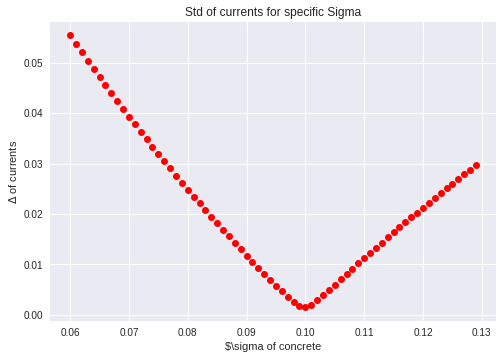

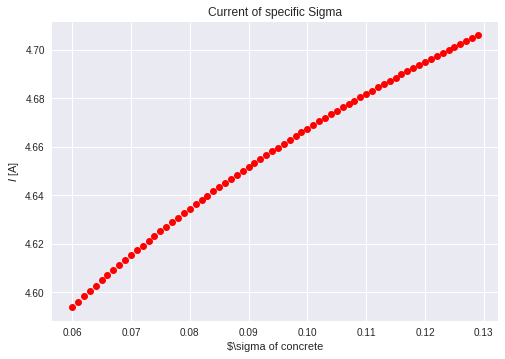

For height  5  RESULTS:  [0.05537521 0.05368433 0.05201147 0.05035729 0.04872261 0.04710672
 0.04550866 0.04392808 0.04235891 0.04081133 0.03928107 0.03776763
 0.03627013 0.03478843 0.03332103 0.03186977 0.03043313 0.02901198
 0.02760423 0.02620661 0.02482814 0.02346312 0.02211166 0.02076916
 0.01944479 0.01813396 0.01683058 0.01554047 0.01426423 0.01300203
 0.01175292 0.01051827 0.00929948 0.00809716 0.00691427 0.00575532
 0.0046473  0.00357821 0.00260491 0.00178015 0.00153289 0.00204404
 0.00292118 0.0039181  0.00495342 0.00600654 0.00706405 0.00812022
 0.00917215 0.01021901 0.01125989 0.01229392 0.01332086 0.01433987
 0.0153519  0.01635631 0.01735328 0.01833805 0.01931923 0.02029358
 0.02126034 0.02221991 0.02317215 0.02411718 0.02505421 0.02598485
 0.02690784 0.02782433 0.0287342  0.02963727] [4.59384775 4.59610416 4.59833365 4.60053818 4.602717   4.60487062
 4.60699971 4.60910469 4.6111793  4.613238   4.61527367 4.61728688
 4.61927801 4.62124769 4.62319693 4.62512498 4.62703124 4.

In [11]:
sigma_irons, stds, currents = run_simulation(5)
        
sigma_iron_peaks, std_peaks = find_minimums(sigma_irons, stds)

print("For height ", 5, " RESULTS: ", stds, currents)
print("     the peaks", sigma_iron_peaks, std_peaks)

In [12]:
#  Continue of  height = 5
sigma_iron_peaks, std_peaks = find_minimums(sigma_irons, np.array(stds))

print("For height ", 5, " RESULTS: ", stds, currents)
print("     the peaks", sigma_iron_peaks, std_peaks)

For height  5  RESULTS:  [0.05537521 0.05368433 0.05201147 0.05035729 0.04872261 0.04710672
 0.04550866 0.04392808 0.04235891 0.04081133 0.03928107 0.03776763
 0.03627013 0.03478843 0.03332103 0.03186977 0.03043313 0.02901198
 0.02760423 0.02620661 0.02482814 0.02346312 0.02211166 0.02076916
 0.01944479 0.01813396 0.01683058 0.01554047 0.01426423 0.01300203
 0.01175292 0.01051827 0.00929948 0.00809716 0.00691427 0.00575532
 0.0046473  0.00357821 0.00260491 0.00178015 0.00153289 0.00204404
 0.00292118 0.0039181  0.00495342 0.00600654 0.00706405 0.00812022
 0.00917215 0.01021901 0.01125989 0.01229392 0.01332086 0.01433987
 0.0153519  0.01635631 0.01735328 0.01833805 0.01931923 0.02029358
 0.02126034 0.02221991 0.02317215 0.02411718 0.02505421 0.02598485
 0.02690784 0.02782433 0.0287342  0.02963727] [4.59384775 4.59610416 4.59833365 4.60053818 4.602717   4.60487062
 4.60699971 4.60910469 4.6111793  4.613238   4.61527367 4.61728688
 4.61927801 4.62124769 4.62319693 4.62512498 4.62703124 4.

SIGMA IRON 1 out of 70
SIGMA IRON 2 out of 70
SIGMA IRON 3 out of 70
SIGMA IRON 4 out of 70
SIGMA IRON 5 out of 70
SIGMA IRON 6 out of 70
SIGMA IRON 7 out of 70
SIGMA IRON 8 out of 70
SIGMA IRON 9 out of 70
SIGMA IRON 10 out of 70
SIGMA IRON 11 out of 70
SIGMA IRON 12 out of 70
SIGMA IRON 13 out of 70
SIGMA IRON 14 out of 70
SIGMA IRON 15 out of 70
SIGMA IRON 16 out of 70
SIGMA IRON 17 out of 70
SIGMA IRON 18 out of 70
SIGMA IRON 19 out of 70
SIGMA IRON 20 out of 70
SIGMA IRON 21 out of 70
SIGMA IRON 22 out of 70
SIGMA IRON 23 out of 70
SIGMA IRON 24 out of 70
SIGMA IRON 25 out of 70
SIGMA IRON 26 out of 70
SIGMA IRON 27 out of 70
SIGMA IRON 28 out of 70
SIGMA IRON 29 out of 70
SIGMA IRON 30 out of 70
SIGMA IRON 31 out of 70
SIGMA IRON 32 out of 70
SIGMA IRON 33 out of 70
SIGMA IRON 34 out of 70
SIGMA IRON 35 out of 70
SIGMA IRON 36 out of 70
SIGMA IRON 37 out of 70
SIGMA IRON 38 out of 70
SIGMA IRON 39 out of 70
SIGMA IRON 40 out of 70
SIGMA IRON 41 out of 70
SIGMA IRON 42 out of 70
S

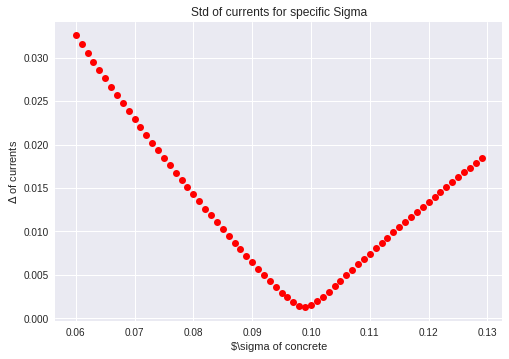

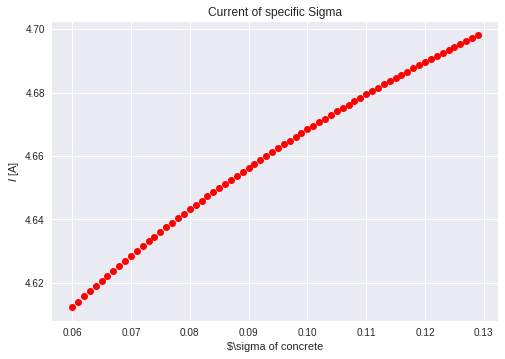

For height  7  RESULTS:  [0.03255092 0.03153844 0.03053724 0.02954828 0.02857043 0.02760341
 0.02664091 0.02569445 0.02475811 0.02383275 0.02291716 0.02201144
 0.02111538 0.02022772 0.01934956 0.01848148 0.01762245 0.01677148
 0.01592394 0.01509134 0.01426647 0.01345012 0.01263704 0.0118374
 0.01104658 0.01025769 0.0094775  0.0087062  0.00794519 0.00719269
 0.00645111 0.00572122 0.00500474 0.00430487 0.00362643 0.00297823
 0.00242266 0.00185674 0.00141328 0.00128757 0.0015096  0.00195275
 0.00249942 0.00309186 0.00370137 0.00432359 0.0049494  0.00557601
 0.00620076 0.00682361 0.00744359 0.00806007 0.00867276 0.00928109
 0.00988547 0.0104857  0.0110816  0.01167312 0.01226003 0.01283779
 0.01341634 0.01399055 0.01456053 0.01512626 0.01568762 0.01624445
 0.01679761 0.01734666 0.01789087 0.01843174] [4.61234342 4.61405165 4.61574042 4.61740985 4.61906043 4.62069281
 4.62229966 4.62389674 4.62547636 4.62703861 4.62858407 4.63011315
 4.63162611 4.63312364 4.63460415 4.63607032 4.63752141 4.6

In [13]:
sigma_irons, stds, currents = run_simulation(7)
        
sigma_iron_peaks, std_peaks = find_minimums(sigma_irons, stds)

print("For height ", 7, " RESULTS: ", stds, currents)
print("     the peaks", sigma_iron_peaks, std_peaks)

SIGMA IRON 1 out of 70
SIGMA IRON 2 out of 70
SIGMA IRON 3 out of 70
SIGMA IRON 4 out of 70
SIGMA IRON 5 out of 70
SIGMA IRON 6 out of 70
SIGMA IRON 7 out of 70
SIGMA IRON 8 out of 70
SIGMA IRON 9 out of 70
SIGMA IRON 10 out of 70
SIGMA IRON 11 out of 70
SIGMA IRON 12 out of 70
SIGMA IRON 13 out of 70
SIGMA IRON 14 out of 70
SIGMA IRON 15 out of 70
SIGMA IRON 16 out of 70
SIGMA IRON 17 out of 70
SIGMA IRON 18 out of 70
SIGMA IRON 19 out of 70
SIGMA IRON 20 out of 70
SIGMA IRON 21 out of 70
SIGMA IRON 22 out of 70
SIGMA IRON 23 out of 70
SIGMA IRON 24 out of 70
SIGMA IRON 25 out of 70
SIGMA IRON 26 out of 70
SIGMA IRON 27 out of 70
SIGMA IRON 28 out of 70
SIGMA IRON 29 out of 70
SIGMA IRON 30 out of 70
SIGMA IRON 31 out of 70
SIGMA IRON 32 out of 70
SIGMA IRON 33 out of 70
SIGMA IRON 34 out of 70
SIGMA IRON 35 out of 70
SIGMA IRON 36 out of 70
SIGMA IRON 37 out of 70
SIGMA IRON 38 out of 70
SIGMA IRON 39 out of 70
SIGMA IRON 40 out of 70
SIGMA IRON 41 out of 70
SIGMA IRON 42 out of 70
S

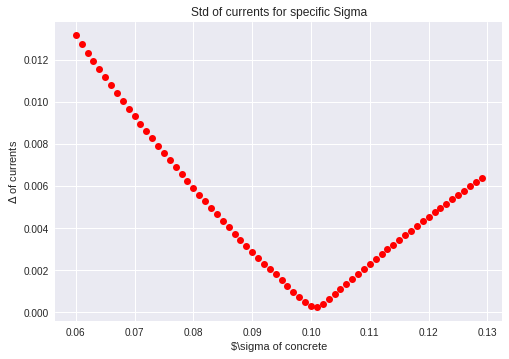

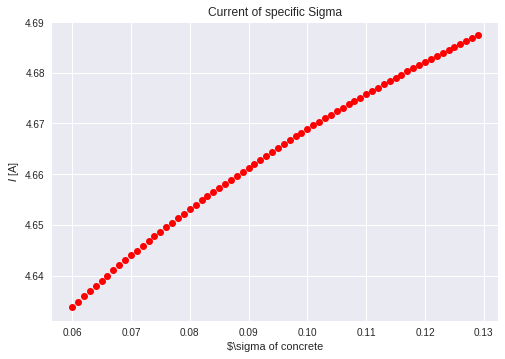

For height  10  RESULTS:  [0.0131497  0.01274473 0.0123377  0.01194325 0.0115535  0.01116905
 0.0107892  0.01041412 0.01004348 0.00967771 0.00931613 0.00895818
 0.00860536 0.00825666 0.00791212 0.00756478 0.00722846 0.00689475
 0.00656601 0.00624108 0.00591226 0.00559448 0.00528032 0.00496263
 0.00464874 0.00434435 0.00403804 0.00373616 0.00343619 0.00314487
 0.00285884 0.00257874 0.00231438 0.002051   0.00180861 0.00155158
 0.00126437 0.00097581 0.0007206  0.00047833 0.00028624 0.00024658
 0.00041278 0.00063723 0.00087474 0.00110974 0.00135018 0.00158959
 0.00182769 0.00206408 0.00229767 0.00253021 0.00276077 0.00298933
 0.00321593 0.00344052 0.00366299 0.00388365 0.00410233 0.00431912
 0.00453399 0.004747   0.00495164 0.00516094 0.00536842 0.00557408
 0.00577802 0.00598018 0.00618065 0.00637943] [4.63375303 4.63482718 4.63588153 4.6369311  4.63796887 4.63899479
 4.64000918 4.64101241 4.64200463 4.64298589 4.64395664 4.64491565
 4.64586557 4.64680537 4.64773505 4.64864781 4.64955822 4

In [14]:
sigma_irons, stds, currents = run_simulation(10)
        
sigma_iron_peaks, std_peaks = find_minimums(sigma_irons, stds)

print("For height ", 10, " RESULTS: ", stds, currents)
print("     the peaks", sigma_iron_peaks, std_peaks)

SIGMA IRON 1 out of 70
SIGMA IRON 2 out of 70
SIGMA IRON 3 out of 70
SIGMA IRON 4 out of 70
SIGMA IRON 5 out of 70
SIGMA IRON 6 out of 70
SIGMA IRON 7 out of 70
SIGMA IRON 8 out of 70
SIGMA IRON 9 out of 70
SIGMA IRON 10 out of 70
SIGMA IRON 11 out of 70
SIGMA IRON 12 out of 70
SIGMA IRON 13 out of 70
SIGMA IRON 14 out of 70
SIGMA IRON 15 out of 70
SIGMA IRON 16 out of 70
SIGMA IRON 17 out of 70
SIGMA IRON 18 out of 70
SIGMA IRON 19 out of 70
SIGMA IRON 20 out of 70
SIGMA IRON 21 out of 70
SIGMA IRON 22 out of 70
SIGMA IRON 23 out of 70
SIGMA IRON 24 out of 70
SIGMA IRON 25 out of 70
SIGMA IRON 26 out of 70
SIGMA IRON 27 out of 70
SIGMA IRON 28 out of 70
SIGMA IRON 29 out of 70
SIGMA IRON 30 out of 70
SIGMA IRON 31 out of 70
SIGMA IRON 32 out of 70
SIGMA IRON 33 out of 70
SIGMA IRON 34 out of 70
SIGMA IRON 35 out of 70
SIGMA IRON 36 out of 70
SIGMA IRON 37 out of 70
SIGMA IRON 38 out of 70
SIGMA IRON 39 out of 70
SIGMA IRON 40 out of 70
SIGMA IRON 41 out of 70
SIGMA IRON 42 out of 70
S

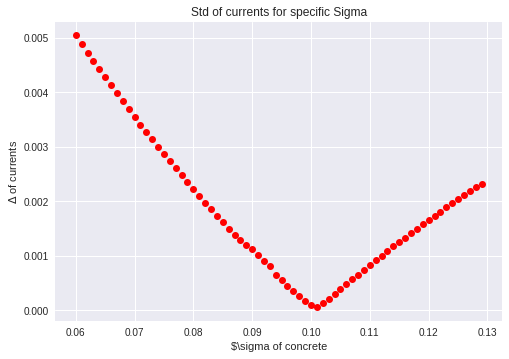

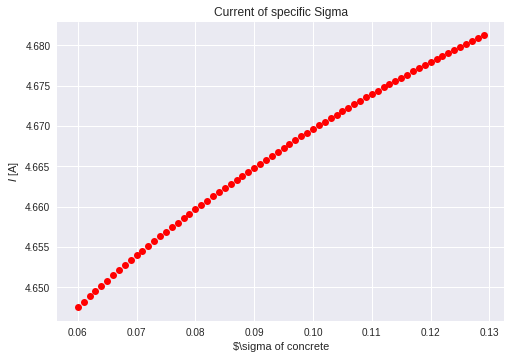

For height  13  RESULTS:  [5.03989746e-03 4.88144943e-03 4.72552025e-03 4.57163310e-03
 4.42007213e-03 4.27037179e-03 4.12300578e-03 3.97640647e-03
 3.83299919e-03 3.69143256e-03 3.55169285e-03 3.40626862e-03
 3.27033898e-03 3.13623040e-03 3.00255546e-03 2.87173624e-03
 2.74274036e-03 2.60693116e-03 2.48106732e-03 2.35681574e-03
 2.22643876e-03 2.10433751e-03 1.97849062e-03 1.85417330e-03
 1.73239705e-03 1.61329862e-03 1.49744070e-03 1.38723690e-03
 1.28809739e-03 1.20092434e-03 1.12288008e-03 1.01651098e-03
 9.11397329e-04 8.08671845e-04 6.53901697e-04 5.50364803e-04
 4.55613844e-04 3.63739297e-04 2.66991466e-04 1.72115076e-04
 9.36235161e-05 6.01392436e-05 1.29071125e-04 2.17422060e-04
 3.07284428e-04 3.98019410e-04 4.88192454e-04 5.70397164e-04
 6.59178482e-04 7.46894846e-04 8.33891271e-04 9.20045228e-04
 1.00439404e-03 1.08889864e-03 1.17255353e-03 1.25529949e-03
 1.33729384e-03 1.41848778e-03 1.49886473e-03 1.57838036e-03
 1.65727374e-03 1.73538000e-03 1.81266480e-03 1.88926186e-0

In [15]:
sigma_irons, stds, currents = run_simulation(13)
        
sigma_iron_peaks, std_peaks = find_minimums(sigma_irons, stds)

print("For height ", 13, " RESULTS: ", stds, currents)
print("     the peaks", sigma_iron_peaks, std_peaks)

SIGMA IRON 1 out of 70
SIGMA IRON 2 out of 70
SIGMA IRON 3 out of 70
SIGMA IRON 4 out of 70
SIGMA IRON 5 out of 70
SIGMA IRON 6 out of 70
SIGMA IRON 7 out of 70
SIGMA IRON 8 out of 70
SIGMA IRON 9 out of 70
SIGMA IRON 10 out of 70
SIGMA IRON 11 out of 70
SIGMA IRON 12 out of 70
SIGMA IRON 13 out of 70
SIGMA IRON 14 out of 70
SIGMA IRON 15 out of 70
SIGMA IRON 16 out of 70
SIGMA IRON 17 out of 70
SIGMA IRON 18 out of 70
SIGMA IRON 19 out of 70
SIGMA IRON 20 out of 70
SIGMA IRON 21 out of 70
SIGMA IRON 22 out of 70
SIGMA IRON 23 out of 70
SIGMA IRON 24 out of 70
SIGMA IRON 25 out of 70
SIGMA IRON 26 out of 70
SIGMA IRON 27 out of 70
SIGMA IRON 28 out of 70
SIGMA IRON 29 out of 70
SIGMA IRON 30 out of 70
SIGMA IRON 31 out of 70
SIGMA IRON 32 out of 70
SIGMA IRON 33 out of 70
SIGMA IRON 34 out of 70
SIGMA IRON 35 out of 70
SIGMA IRON 36 out of 70
SIGMA IRON 37 out of 70
SIGMA IRON 38 out of 70
SIGMA IRON 39 out of 70
SIGMA IRON 40 out of 70
SIGMA IRON 41 out of 70
SIGMA IRON 42 out of 70
S

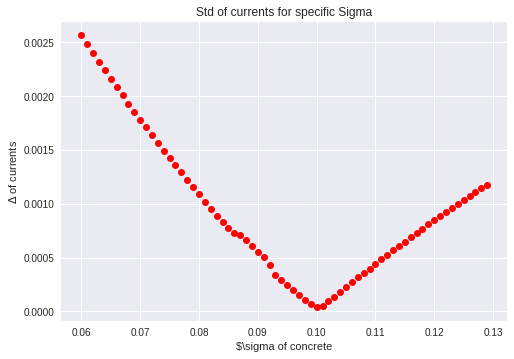

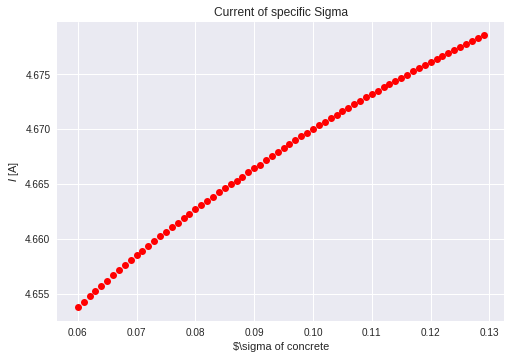

For height  13  RESULTS:  [2.56540707e-03 2.48260127e-03 2.40099052e-03 2.31939588e-03
 2.24031745e-03 2.16246410e-03 2.08553679e-03 2.00989819e-03
 1.92760768e-03 1.85411879e-03 1.78185688e-03 1.70924416e-03
 1.63891799e-03 1.56956081e-03 1.49386737e-03 1.42533589e-03
 1.35878054e-03 1.29225243e-03 1.22071944e-03 1.15589073e-03
 1.08671436e-03 1.01852382e-03 9.52331257e-04 8.88462426e-04
 8.27686296e-04 7.72658919e-04 7.28143263e-04 7.06129881e-04
 6.64779849e-04 6.09760560e-04 5.55456074e-04 5.01856628e-04
 4.30646355e-04 3.35792688e-04 2.90893968e-04 2.40169924e-04
 1.96766309e-04 1.47344764e-04 1.07794192e-04 6.41075008e-05
 3.79689832e-05 5.31034983e-05 9.27199674e-05 1.36983997e-04
 1.82057505e-04 2.26328905e-04 2.71287294e-04 3.15812254e-04
 3.51867137e-04 3.95533952e-04 4.38826801e-04 4.81692120e-04
 5.24074184e-04 5.66007981e-04 6.06380447e-04 6.47398797e-04
 6.88180314e-04 7.28362749e-04 7.68074898e-04 8.07419333e-04
 8.46351805e-04 8.84840553e-04 9.22743554e-04 9.60577825e-0

In [16]:
sigma_irons, stds, currents = run_simulation(15)
        
sigma_iron_peaks, std_peaks = find_minimums(sigma_irons, stds)

print("For height ", 13, " RESULTS: ", stds, currents)
print("     the peaks", sigma_iron_peaks, std_peaks)

SIGMA IRON 1 out of 70
SIGMA IRON 2 out of 70
SIGMA IRON 3 out of 70
SIGMA IRON 4 out of 70
SIGMA IRON 5 out of 70
SIGMA IRON 6 out of 70
SIGMA IRON 7 out of 70
SIGMA IRON 8 out of 70
SIGMA IRON 9 out of 70
SIGMA IRON 10 out of 70
SIGMA IRON 11 out of 70
SIGMA IRON 12 out of 70
SIGMA IRON 13 out of 70
SIGMA IRON 14 out of 70
SIGMA IRON 15 out of 70
SIGMA IRON 16 out of 70
SIGMA IRON 17 out of 70
SIGMA IRON 18 out of 70
SIGMA IRON 19 out of 70
SIGMA IRON 20 out of 70
SIGMA IRON 21 out of 70
SIGMA IRON 22 out of 70
SIGMA IRON 23 out of 70
SIGMA IRON 24 out of 70
SIGMA IRON 25 out of 70
SIGMA IRON 26 out of 70
SIGMA IRON 27 out of 70
SIGMA IRON 28 out of 70
SIGMA IRON 29 out of 70
SIGMA IRON 30 out of 70
SIGMA IRON 31 out of 70
SIGMA IRON 32 out of 70
SIGMA IRON 33 out of 70
SIGMA IRON 34 out of 70
SIGMA IRON 35 out of 70
SIGMA IRON 36 out of 70
SIGMA IRON 37 out of 70
SIGMA IRON 38 out of 70
SIGMA IRON 39 out of 70
SIGMA IRON 40 out of 70
SIGMA IRON 41 out of 70
SIGMA IRON 42 out of 70
S

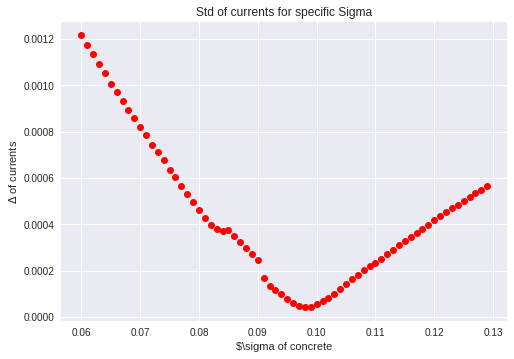

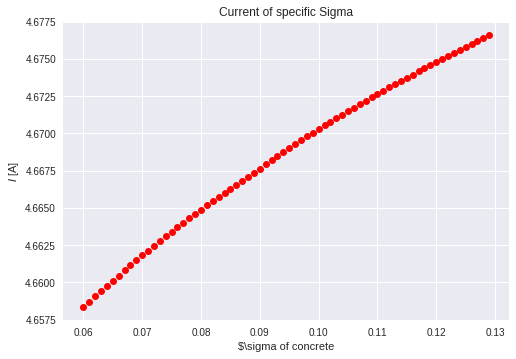

For height  13  RESULTS:  [1.21497748e-03 1.17355930e-03 1.13263852e-03 1.09267070e-03
 1.05335824e-03 1.00688169e-03 9.68858490e-04 9.30252613e-04
 8.93384903e-04 8.57263291e-04 8.21708110e-04 7.86722200e-04
 7.43538757e-04 7.09659264e-04 6.76211765e-04 6.35375287e-04
 6.02997393e-04 5.63922466e-04 5.31794892e-04 4.94909265e-04
 4.59838281e-04 4.26991393e-04 3.97265907e-04 3.78565557e-04
 3.68659777e-04 3.77068354e-04 3.50033586e-04 3.23415092e-04
 2.97205466e-04 2.71397730e-04 2.45985429e-04 1.66497117e-04
 1.31813631e-04 1.15149489e-04 9.73999491e-05 7.64282144e-05
 6.19242206e-05 4.74954431e-05 4.17985304e-05 4.24989805e-05
 5.38058162e-05 7.05940208e-05 8.10512990e-05 1.00968445e-04
 1.21157100e-04 1.41454728e-04 1.61597439e-04 1.81147875e-04
 2.01179729e-04 2.21047412e-04 2.31920669e-04 2.51380040e-04
 2.70603675e-04 2.89775597e-04 3.08661830e-04 3.27338998e-04
 3.45776624e-04 3.62850370e-04 3.80825328e-04 3.98699121e-04
 4.16322932e-04 4.33745053e-04 4.50857240e-04 4.67869588e-0

In [17]:
sigma_irons, stds, currents = run_simulation(17)
        
sigma_iron_peaks, std_peaks = find_minimums(sigma_irons, stds)

print("For height ", 13, " RESULTS: ", stds, currents)
print("     the peaks", sigma_iron_peaks, std_peaks)

SIGMA IRON 1 out of 70
SIGMA IRON 2 out of 70
SIGMA IRON 3 out of 70
SIGMA IRON 4 out of 70
SIGMA IRON 5 out of 70
SIGMA IRON 6 out of 70
SIGMA IRON 7 out of 70
SIGMA IRON 8 out of 70
SIGMA IRON 9 out of 70
SIGMA IRON 10 out of 70
SIGMA IRON 11 out of 70
SIGMA IRON 12 out of 70
SIGMA IRON 13 out of 70
SIGMA IRON 14 out of 70
SIGMA IRON 15 out of 70
SIGMA IRON 16 out of 70
SIGMA IRON 17 out of 70
SIGMA IRON 18 out of 70
SIGMA IRON 19 out of 70
SIGMA IRON 20 out of 70
SIGMA IRON 21 out of 70
SIGMA IRON 22 out of 70
SIGMA IRON 23 out of 70
SIGMA IRON 24 out of 70
SIGMA IRON 25 out of 70
SIGMA IRON 26 out of 70
SIGMA IRON 27 out of 70
SIGMA IRON 28 out of 70
SIGMA IRON 29 out of 70
SIGMA IRON 30 out of 70
SIGMA IRON 31 out of 70
SIGMA IRON 32 out of 70
SIGMA IRON 33 out of 70
SIGMA IRON 34 out of 70
SIGMA IRON 35 out of 70
SIGMA IRON 36 out of 70
SIGMA IRON 37 out of 70
SIGMA IRON 38 out of 70
SIGMA IRON 39 out of 70
SIGMA IRON 40 out of 70
SIGMA IRON 41 out of 70
SIGMA IRON 42 out of 70
S

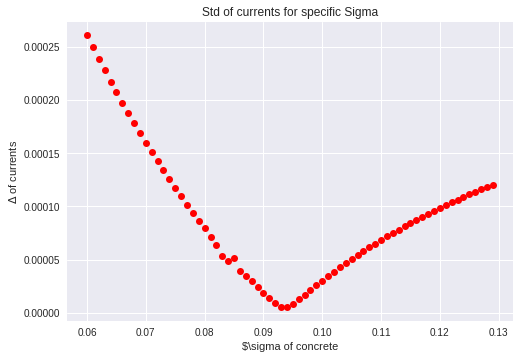

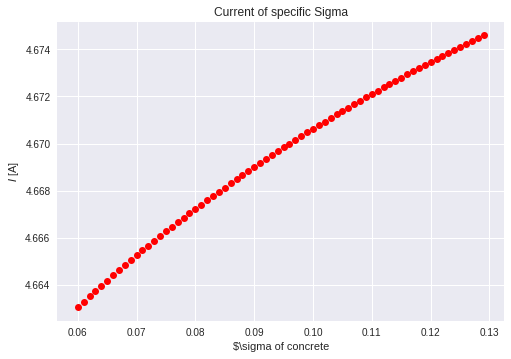

For height  13  RESULTS:  [2.60841404e-04 2.49563201e-04 2.38567624e-04 2.27844808e-04
 2.17386396e-04 2.07180438e-04 1.97232779e-04 1.87531367e-04
 1.78066563e-04 1.68828370e-04 1.59816345e-04 1.51030905e-04
 1.42453703e-04 1.34057115e-04 1.25898673e-04 1.17758980e-04
 1.09983819e-04 1.01363972e-04 9.39437236e-05 8.67194134e-05
 7.94863945e-05 7.14212973e-05 6.33852828e-05 5.31879771e-05
 4.86660029e-05 5.14038459e-05 3.87617908e-05 3.42289722e-05
 2.94087984e-05 2.40851492e-05 1.88336349e-05 1.42142407e-05
 9.39221592e-06 5.58995689e-06 5.16202657e-06 8.35875514e-06
 1.25989584e-05 1.70313794e-05 2.14576901e-05 2.58609390e-05
 3.01629784e-05 3.43746060e-05 3.85084031e-05 4.25608728e-05
 4.65107831e-05 5.03660943e-05 5.41311591e-05 5.78256908e-05
 6.14416584e-05 6.49618543e-05 6.83973780e-05 7.17434151e-05
 7.50166528e-05 7.82250957e-05 8.13609442e-05 8.44187805e-05
 8.74046458e-05 9.03107067e-05 9.31516078e-05 9.59214437e-05
 9.86286131e-05 1.01265223e-04 1.03883142e-04 1.06410878e-0

In [22]:
sigma_irons, stds, currents = run_simulation(20)
        
sigma_iron_peaks, std_peaks = find_minimums(sigma_irons, stds)

print("For height ", 13, " RESULTS: ", stds, currents)
print("     the peaks", sigma_iron_peaks, std_peaks)

In [0]:
sigma_irons, stds, currents = run_simulation(23)
        
sigma_iron_peaks, std_peaks = find_minimums(sigma_irons, stds)

print("For height ", 23, " RESULTS: ", stds, currents)
print("     the peaks", sigma_iron_peaks, std_peaks)

SIGMA IRON 1 out of 70
SIGMA IRON 2 out of 70
SIGMA IRON 3 out of 70
SIGMA IRON 4 out of 70
SIGMA IRON 5 out of 70
SIGMA IRON 6 out of 70
SIGMA IRON 7 out of 70
SIGMA IRON 8 out of 70
SIGMA IRON 9 out of 70
SIGMA IRON 10 out of 70


In [0]:
sigma_irons, stds, currents = run_simulation(25)
        
sigma_iron_peaks, std_peaks = find_minimums(sigma_irons, stds)

print("For height ", 25, " RESULTS: ", stds, currents)
print("     the peaks", sigma_iron_peaks, std_peaks)